In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('8850 Orders_NoDuplicates.csv')

In [4]:
print(df.head())

        EDIPI Last Name  First Name SFMCC SFBGRD Current Grade       SEDD  \
0  1277501488    WARNER      STEVEN   TD9     O4            O4  7/28/2024   
1  1396321722     RAMOS     ANTHONY   NBW     O4            O4  6/27/2024   
2  1276824003     SMITH  CHRISTOPHE   007     O5            O5  6/27/2024   
3  1501314249     BEGGS    RANDOLPH   007     O4            O3  6/27/2024   
4  1500970410  HARRISON       QUINN   063     O4            O3  6/27/2024   

        SEDA Est EAS In Payback Tour  FTCF SPMCC PMCC  
0  7/29/2024     NaN             Yes    36   NBW  NBW  
1  7/27/2024     NaN             Yes    36   H99  H99  
2  7/27/2024     NaN             Yes    36   H99  H99  
3  7/27/2024     NaN             Yes    36   H99  H99  
4  7/27/2024     NaN             Yes    36   H99  H99  


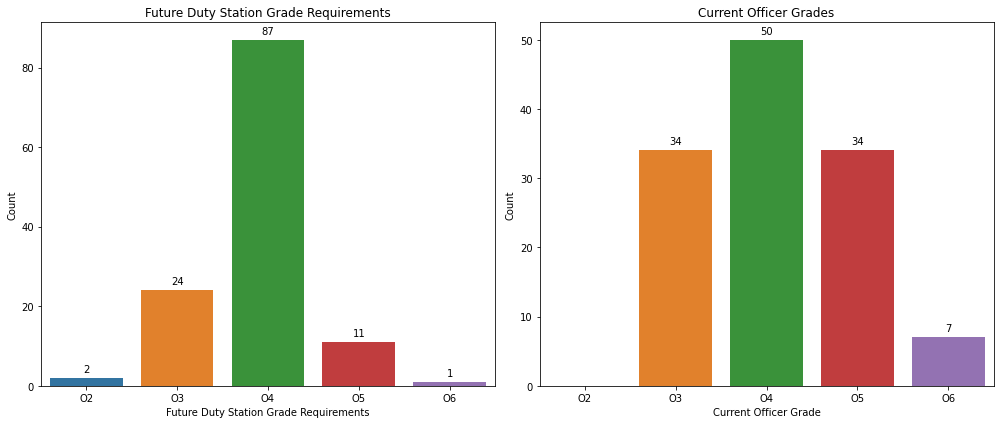

In [7]:
sfgmd_counts = df['SFBGRD'].value_counts().reset_index()
sfgmd_counts.columns = ['SFBGRD', 'Count']

current_grade_counts = df['Current Grade'].value_counts().reset_index()
current_grade_counts.columns = ['Current Grade', 'Count']

# Define the desired order of categories
category_order = ['O2', 'O3', 'O4', 'O5', 'O6']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for 'SFBGRD'
sns.barplot(x='SFBGRD', y='Count', data=sfgmd_counts, ax=axes[0], order=category_order)
axes[0].set_title('Future Duty Station Grade Requirements')
axes[0].set_xlabel('Future Duty Station Grade Requirements')
axes[0].set_ylabel('Count')

# Add count numbers on top of bars for 'SFBGRD'
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9), textcoords = 'offset points')

# Bar chart for 'Current Grade'
sns.barplot(x='Current Grade', y='Count', data=current_grade_counts, ax=axes[1], order=category_order)
axes[1].set_title('Current Officer Grades')
axes[1].set_xlabel('Current Officer Grade')
axes[1].set_ylabel('Count')

# Add count numbers on top of bars for 'Current Grade'
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9), textcoords = 'offset points')


# Show the plots
plt.tight_layout()
plt.show()

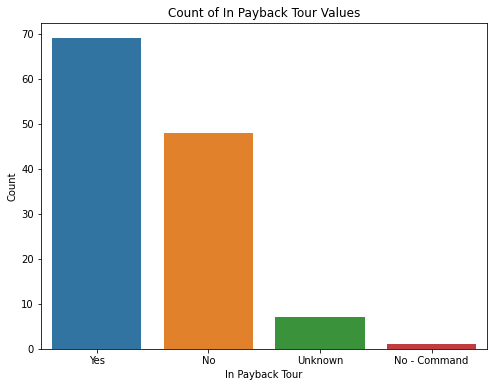

In [8]:
payback_tour_counts = df['In Payback Tour'].value_counts().reset_index()
payback_tour_counts.columns = ['In Payback Tour', 'Count']

# Plot for 'In Payback Tour'
plt.figure(figsize=(8, 6))
sns.barplot(x='In Payback Tour', y='Count', data=payback_tour_counts)
plt.title('Count of In Payback Tour Values')
plt.xlabel('In Payback Tour')
plt.ylabel('Count')
plt.show()

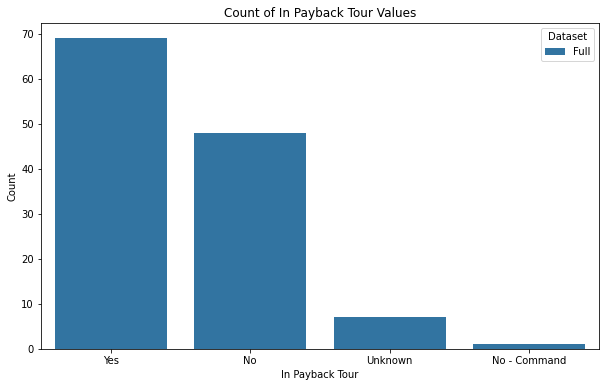

In [14]:
# Count the values in the 'In Payback Tour' column for full DataFrame
payback_tour_counts_full = df['In Payback Tour'].value_counts().reset_index()
payback_tour_counts_full.columns = ['In Payback Tour', 'Count']
payback_tour_counts_full['Dataset'] = 'Full'

# Plot side-by-side bar plots
plt.figure(figsize=(10, 6))
sns.barplot(x='In Payback Tour', y='Count', hue='Dataset', data=payback_tour_counts_full)
plt.title('Count of In Payback Tour Values')
plt.xlabel('In Payback Tour')
plt.ylabel('Count')
plt.show()

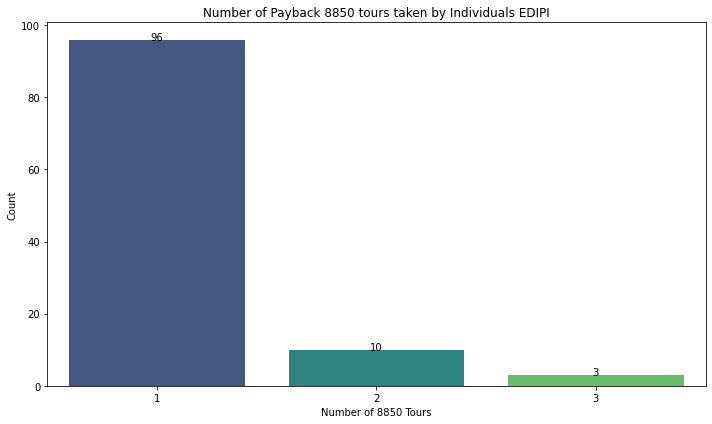

In [12]:
# Replace 'YourColumnName' with the name of the column you want to analyze
column_name = 'EDIPI'

# Step 1: Count the occurrences of each unique value in the column
value_counts = df[column_name].value_counts()

# Step 2: Count how many unique values fall into each repetition frequency
repeat_counts = value_counts.value_counts().reset_index()
repeat_counts.columns = ['Repetition Frequency', 'Count']

# Sort by Repetition Frequency for better visualization
repeat_counts = repeat_counts.sort_values(by='Repetition Frequency')

# Step 3: Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Repetition Frequency', y='Count', data=repeat_counts, palette='viridis')

# Add count numbers on top of bars
for index, row in repeat_counts.iterrows():
    plt.text(row.name, row['Count'], row['Count'], color='black', ha="center")

plt.title(f'Number of Payback 8850 Tours Completed by Graduates {column_name}')
plt.xlabel('Number of 8850 Tours')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()